In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [31]:
data = pd.read_csv('StudentsPerformance.csv')

In [32]:
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [34]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

### BarPlot

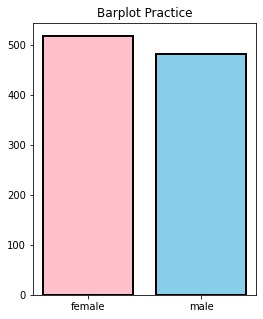

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(4,5))

label = data['gender'].value_counts().index

x = np.arange(2)
y = data['gender'].value_counts()

ax.bar(x,y, color = ['pink', 'skyblue'], edgecolor = 'black', linewidth = 2, tick_label = label)
ax.set_title("Barplot Practice")
plt.show()

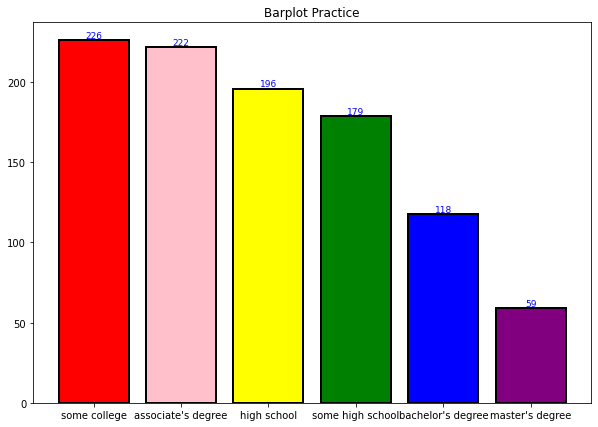

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(10,7))

label = data['parental level of education'].value_counts().index
value = data['parental level of education'].value_counts().reset_index(drop=True)

x = np.arange(6)
y = data['parental level of education'].value_counts()

ax.bar(x,y, color = ['red', 'pink', 'yellow', 'green', 'blue' ,'purple'], edgecolor = 'black', linewidth = 2, tick_label = label)
ax.set_title("Barplot Practice")
for i, v in enumerate(x):
    plt.text(v, value[i], value[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='blue',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')
plt.show()

### Piechart

In [37]:
len(data['race/ethnicity'].unique())

5

In [38]:
data['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [39]:
label = data['race/ethnicity'].value_counts().index

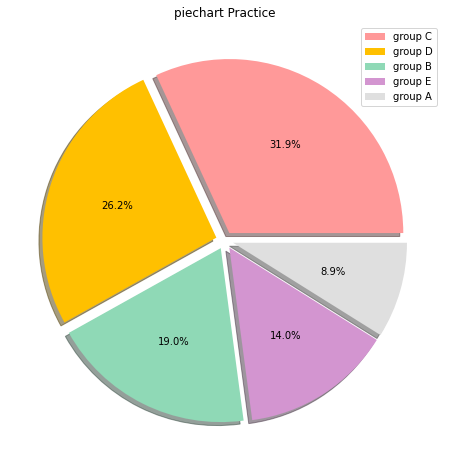

In [40]:
fig, axes = plt.subplots(1, 1, figsize=(8, 8))


x = np.arange(5)
y = data['race/ethnicity'].value_counts()

explode = [0.05, 0.05, 0.05, 0.05, 0.05] #중심에서 벗어나는 정도
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', "#dfdfdf"]

#shadow : 그림자 설정

axes.pie(y, autopct='%0.1f%%', explode = explode, colors = colors, shadow = True)
axes.set_title("piechart Practice")
axes.legend(label, loc = 'upper right')
plt.show()

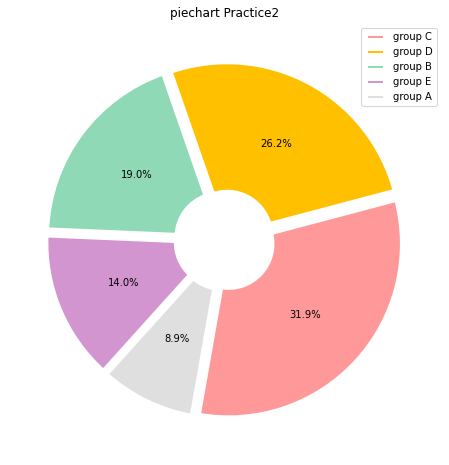

In [41]:
fig, axes = plt.subplots(1, 1, figsize=(8, 8))


x = np.arange(5)
y = data['race/ethnicity'].value_counts()

explode = [0.03, 0.03, 0.03, 0.03, 0.03]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', "#dfdfdf"] 
wedgeprops={'width': 0.75 , 'edgecolor': 'w', 'linewidth': 5} #부채꼴 영역 스타일 조정

#startangle : 시작각도 설정

axes.pie(y, autopct='%0.1f%%', explode = explode, colors = colors, startangle=260, wedgeprops=wedgeprops)
axes.set_title("piechart Practice2")
axes.legend(label, loc = 'upper right')
plt.show()

### Scatter

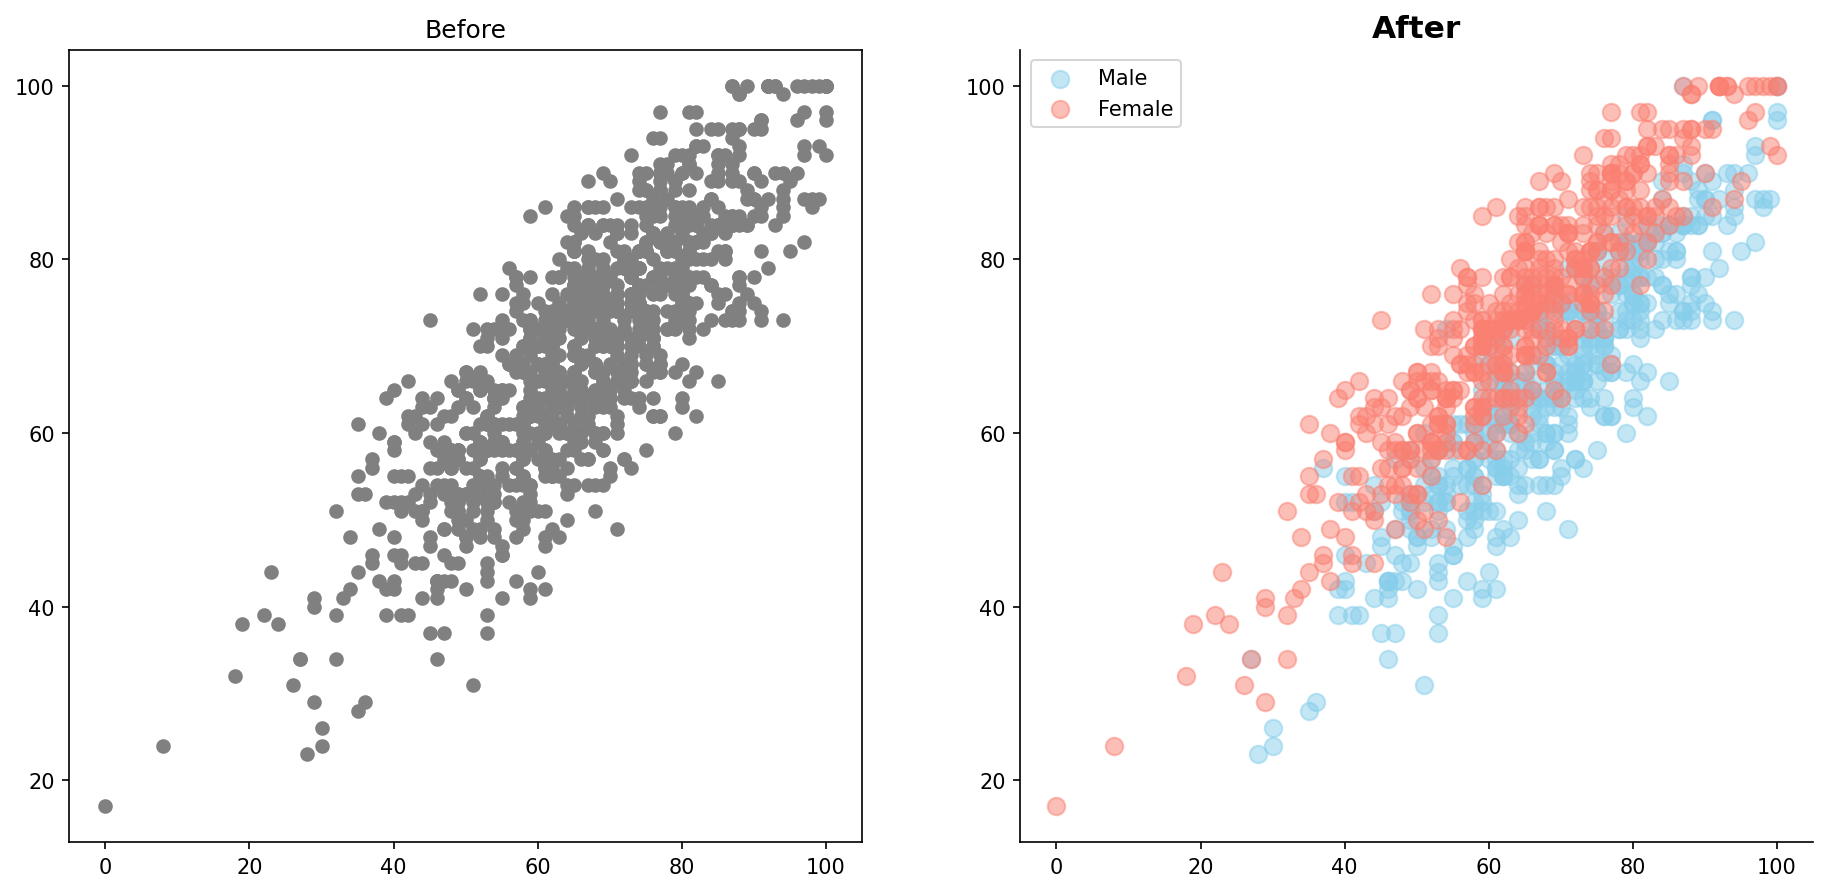

In [42]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7), dpi=150)

ax[0].scatter(x='math score', y='reading score',data=data, color='gray')
ax[0].set_title('Before')

ax[1].scatter(x='math score', y='reading score',data=data[data['gender']=='male'],
              color='skyblue', alpha=0.5, label='Male', s=70)
ax[1].scatter(x='math score', y='reading score',data=data[data['gender']=='female'],
              color='salmon', alpha=0.5, label='Female', s=70)
ax[1].set_title('After', fontsize=15, fontweight='bold')

ax[1].legend()

# upper & right border remove 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

### gca() : 현재의 axes 객체를 표현. 현재의 axes 객체라는 것은 가장 마지막 axes객체(그래프)를 나타내는 듯 하다.
### spines : 그래프의 테두리와 관련된 함수로 테두리를 없애거나 테두리의 굵기를 조절할 수도 있다.
#### spines['테두리 위치'].set_visible() : 테두리의 존재 여부
#### spines['테두리 위치'].set_color() : 테두리 색상 지정
#### spines['테두리 위치'].set_linewidth() : 테두리 굵기 지정

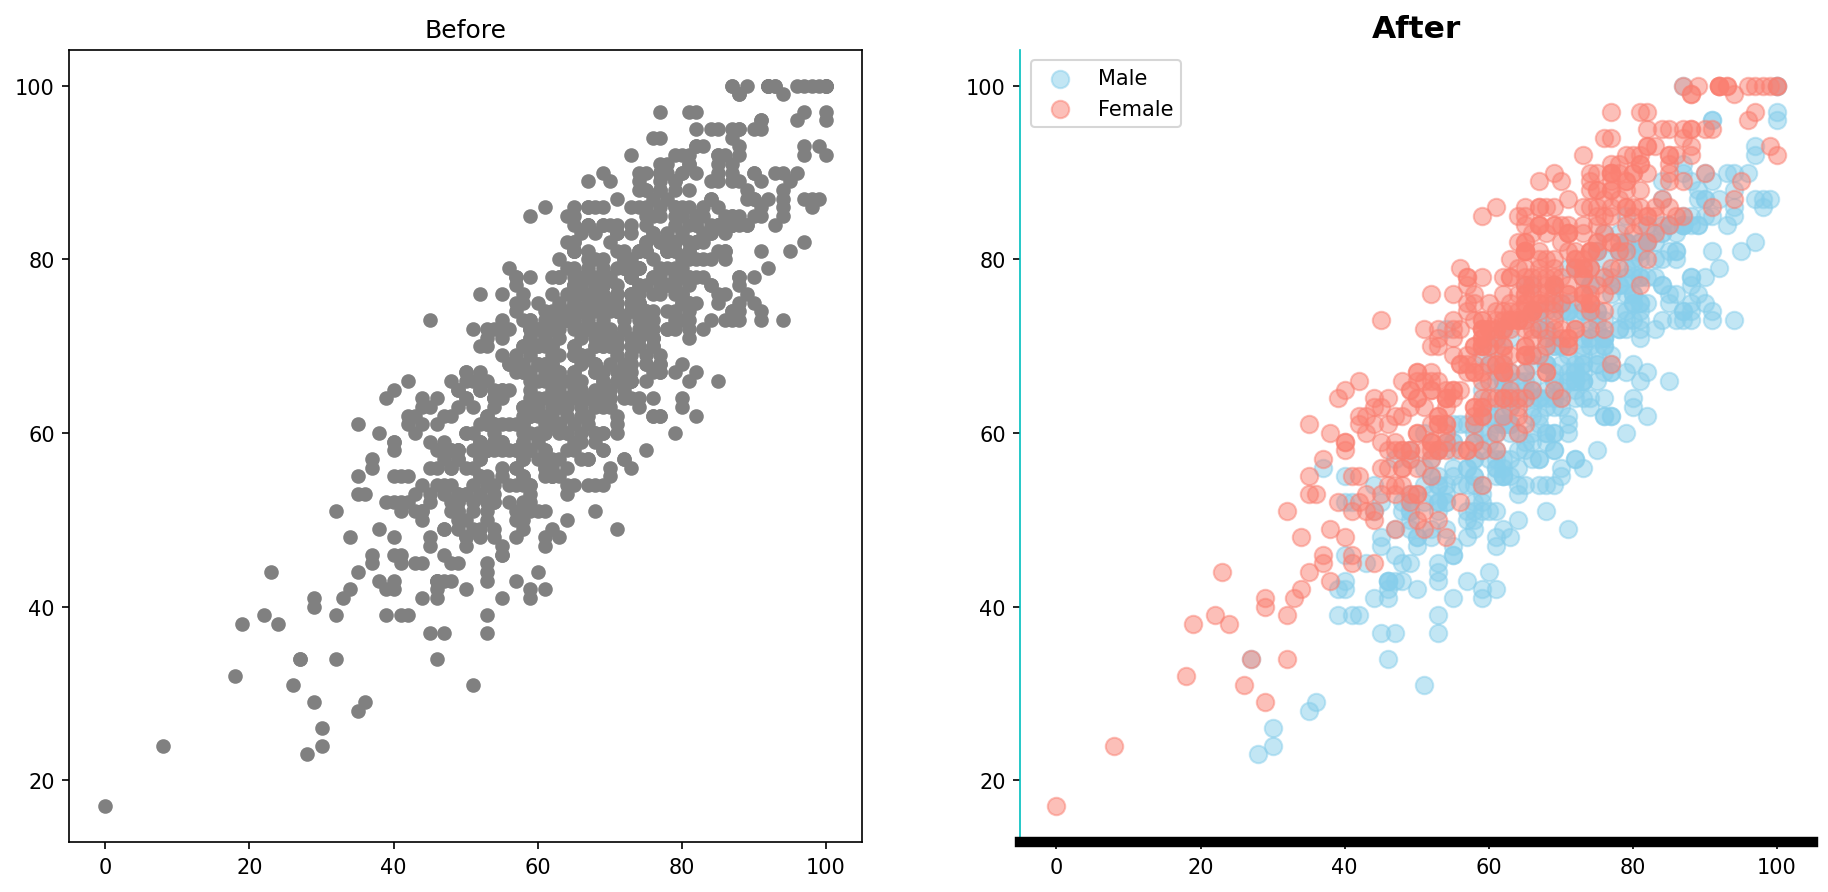

In [43]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7), dpi=150)

ax[0].scatter(x='math score', y='reading score',data=data, color='gray')
ax[0].set_title('Before')

ax[1].scatter(x='math score', y='reading score',data=data[data['gender']=='male'],
              color='skyblue', alpha=0.5, label='Male', s=70)
ax[1].scatter(x='math score', y='reading score',data=data[data['gender']=='female'],
              color='salmon', alpha=0.5, label='Female', s=70)
ax[1].set_title('After', fontsize=15, fontweight='bold')

ax[1].legend()

# upper & right border remove 
# 여기서 gca()로 불러오는 axes 객체는 ax[1]과 같음.
# plt.gca() -> ax[1]로 바꿔도 같은 결과.
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
ax[1].spines['left'].set_color('c')
ax[1].spines['bottom'].set_linewidth(5)
plt.show()

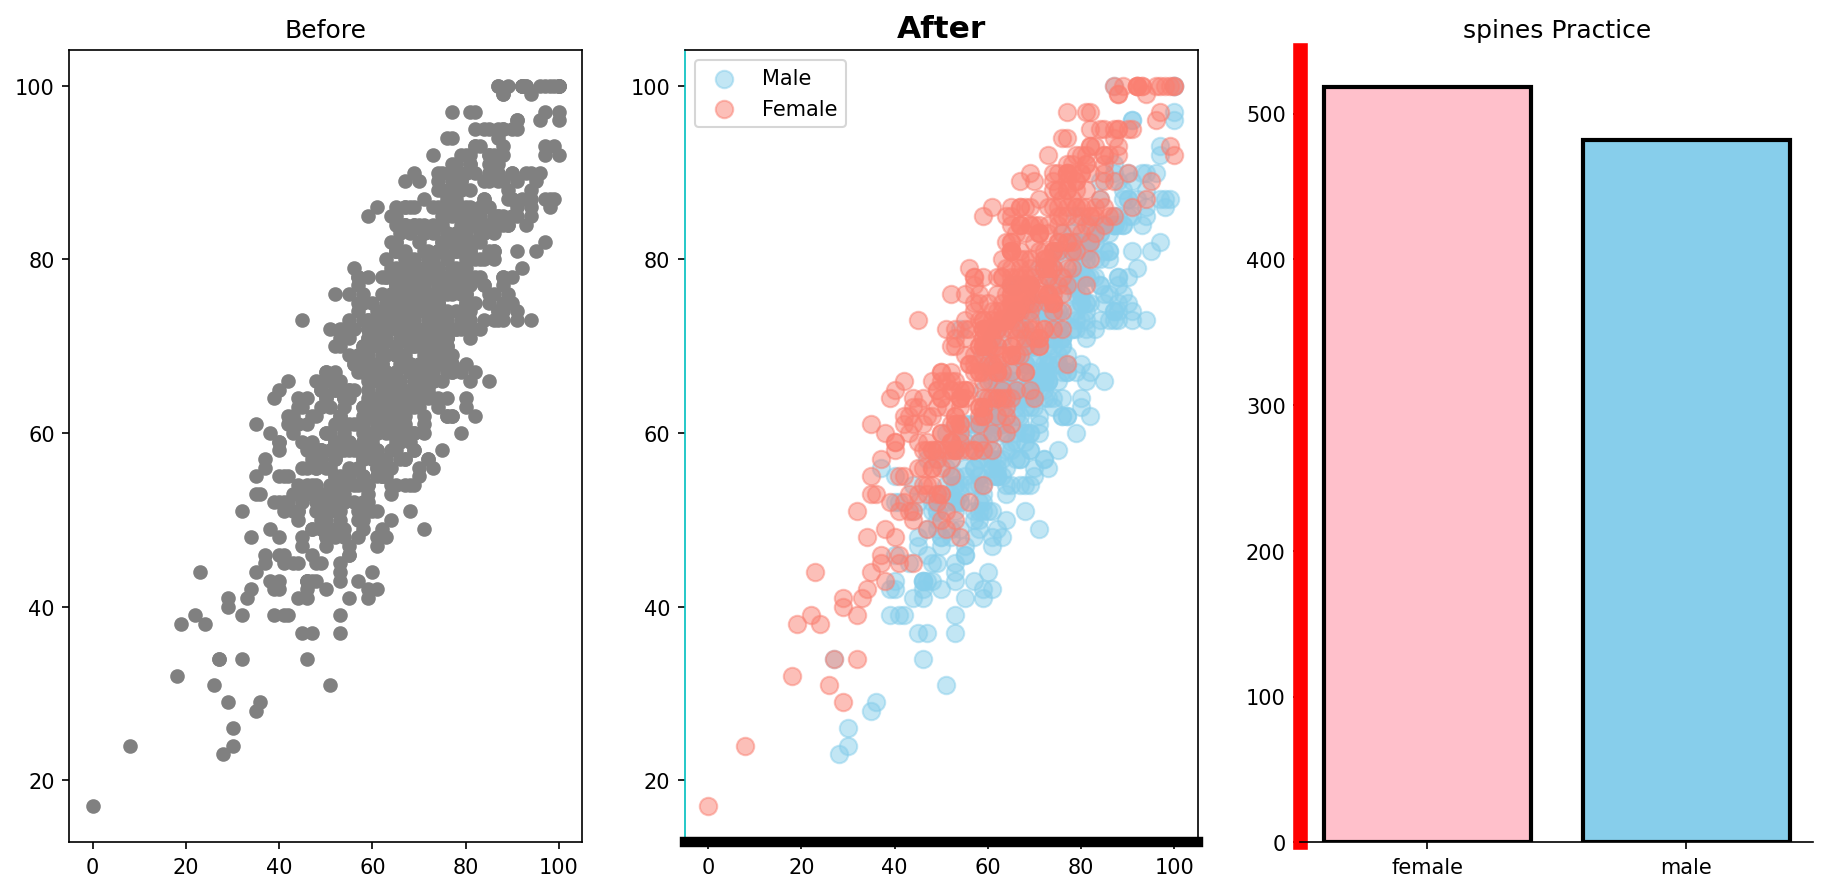

In [57]:
fig, ax = plt.subplots(1, 3, figsize = (15, 7), dpi=150)

ax[0].scatter(x='math score', y='reading score',data=data, color='gray')
ax[0].set_title('Before')

ax[1].scatter(x='math score', y='reading score',data=data[data['gender']=='male'],
              color='skyblue', alpha=0.5, label='Male', s=70)
ax[1].scatter(x='math score', y='reading score',data=data[data['gender']=='female'],
              color='salmon', alpha=0.5, label='Female', s=70)
ax[1].set_title('After', fontsize=15, fontweight='bold')

ax[1].legend()

label = data['gender'].value_counts().index

x = np.arange(2)
y = data['gender'].value_counts()

ax[2].bar(x,y, color = ['pink', 'skyblue'], edgecolor = 'black', linewidth = 2, tick_label = label)
ax[2].set_title("spines Practice")

# upper & right border remove 
# 여기서 gca()로 불러오는 axes 객체는 ax[2]과 같음.
# plt.gca() -> ax[2]로 바꿔도 같은 결과.
# 다른 그래프를 선택하고 싶으면 각 그래프의 위치를 이용하여 서식 적용
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
ax[1].spines['left'].set_color('c')
ax[1].spines['bottom'].set_linewidth(5)
ax[2].spines['left'].set_color('r')
ax[2].spines['left'].set_linewidth(7)
plt.show()

### Boxplot

In [45]:
male = data[data['gender'] == 'male']

In [46]:
female = data[data['gender'] == 'female']

In [47]:
male

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
10,male,group C,associate's degree,standard,none,58,54,52
...,...,...,...,...,...,...,...,...
985,male,group A,high school,standard,none,57,51,54
987,male,group E,some high school,standard,completed,81,75,76
990,male,group E,high school,free/reduced,completed,86,81,75
994,male,group A,high school,standard,none,63,63,62


In [48]:
female

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
...,...,...,...,...,...,...,...,...
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


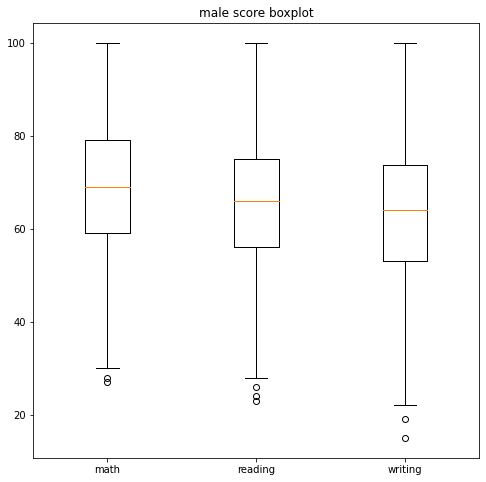

In [49]:
male_math = male['math score']
male_reading = male['reading score']
male_writing = male['writing score']

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.boxplot([male_math, male_reading, male_writing])
ax.set_title('male score boxplot')
ax.xaxis.set_major_formatter(ticker.FixedFormatter(('math', 'reading', 'writing')))

plt.show()

In [50]:
male.iloc[:,5:].describe()

,math score,reading score,writing score
count,482.000000,482.000000,482.000000
mean,68.728216,65.473029,63.311203
std,14.356277,13.931832,14.113832
min,27.000000,23.000000,15.000000
25%,59.000000,56.000000,53.000000
50%,69.000000,66.000000,64.000000
75%,79.000000,75.000000,73.750000
max,100.000000,100.000000,100.000000


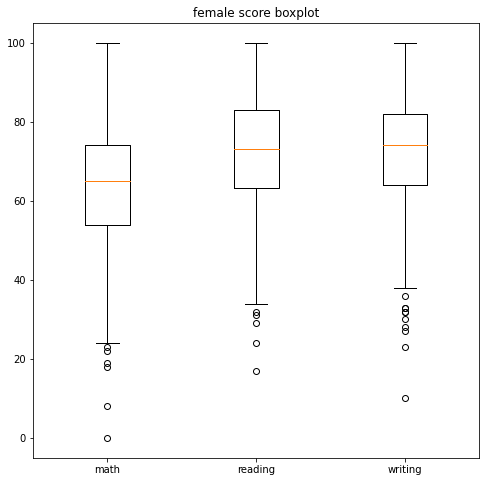

In [51]:
female_math = female['math score']
female_reading = female['reading score']
female_writing = female['writing score']

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.boxplot([female_math, female_reading, female_writing])
ax.set_title('female score boxplot')
ax.xaxis.set_major_formatter(ticker.FixedFormatter(('math', 'reading', 'writing')))

plt.show()

In [52]:
female.iloc[:,5:].describe()

,math score,reading score,writing score
count,518.000000,518.000000,518.000000
mean,63.633205,72.608108,72.467181
std,15.491453,14.378245,14.844842
min,0.000000,17.000000,10.000000
25%,54.000000,63.250000,64.000000
50%,65.000000,73.000000,74.000000
75%,74.000000,83.000000,82.000000
max,100.000000,100.000000,100.000000


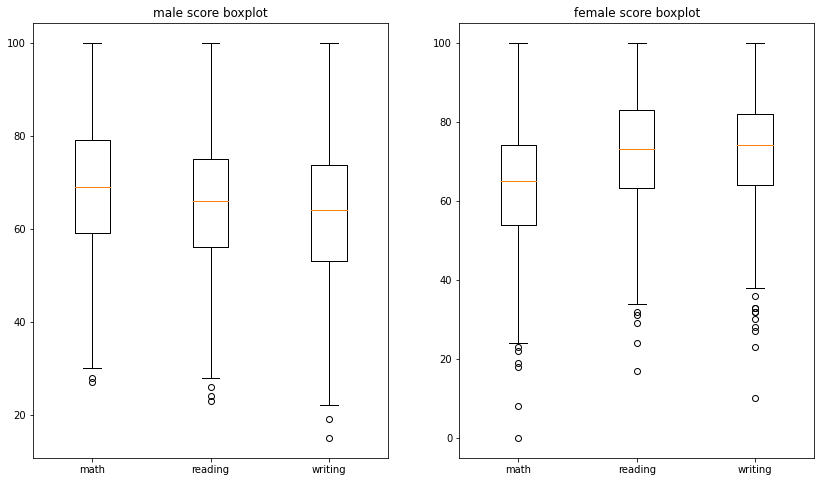

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(14,8))

male_math = male['math score']
male_reading = male['reading score']
male_writing = male['writing score']
female_math = female['math score']
female_reading = female['reading score']
female_writing = female['writing score']

ax[0].boxplot([male_math, male_reading, male_writing])
ax[0].set_title('male score boxplot')
ax[0].xaxis.set_major_formatter(ticker.FixedFormatter(('math', 'reading', 'writing')))

ax[1].boxplot([female_math, female_reading, female_writing])
ax[1].set_title('female score boxplot')
ax[1].xaxis.set_major_formatter(ticker.FixedFormatter(('math', 'reading', 'writing')))

plt.show()

## Matplolib.ticker

### Matplotlib.ticker는 눈금 위치 지정 및 형식 지정을 할 수 있는 클래스를 포함한다.

### https://runebook.dev/ko/docs/matplotlib/ticker_api

### set_major_formatter() : 주요 눈금의 이름과 같은 형식 지정을 하는 메서드
### set_minor_formatter() : 보조 눈금의 이름과 같은 형식 지정을 하는 메서드
### set_major_locator() : 주요 눈금의 위치와 관련된 서식을 지정하는 메서드
### set_minor_locator() : 보조 눈금의 위치와 관련된 서식을 지정하는 메서드 

### ticker는 위 4개 메서드와 같이 쓰이는 경우가 많다.

### Histogram

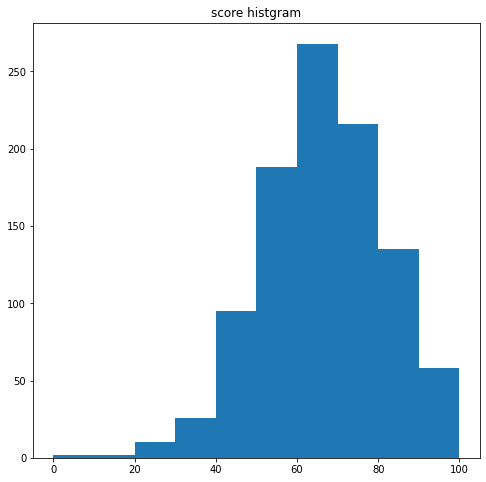

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.hist((data['math score']))
ax.set_title('score histgram')
plt.show()

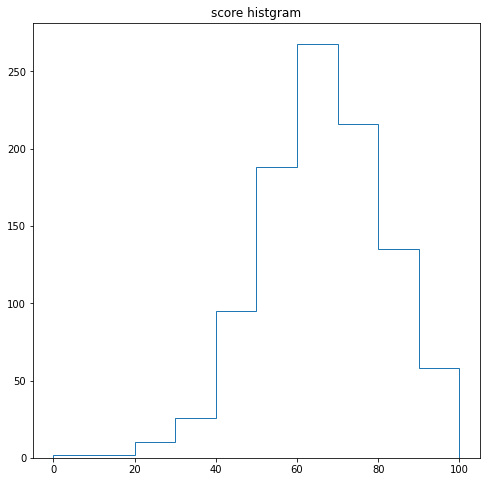

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.hist((data['math score']), histtype = "step")
ax.set_title('score histgram')
plt.show()